

# Derivadas



In [ ]:
# Para imprimir todas las líneas
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Solo la última
#InteractiveShell.ast_node_interactivity = "last_expr"

Importación de las librerías necesarias

In [1]:
import numpy as np
from sympy import * # Librería de Calculo
from sympy.plotting import plot as symplot # Librería para las gráficas
from sympy.abc import x, y, z, h # Carga de un simbolico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para las gráficas

## Límites en Python

El concepto de límite es la base del Cálculo Diferencial.

Recordad que:

$f'(x)=\lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}$

Podemos calcular límites en Python utilizando la expresión ```limit(funcion, variable, punto, lateral)``` proporcionada por la librería Sympy.

In [ ]:
# Ejemplo
x = symbols('x')
limit(sin(x)/x, x, 0)
limit(1/x, x, 0, '+')
limit(x**2, x, 0, '-')

0

In [ ]:
limit((cos(x + h) - cos(x))/h, h, 0) # Cálculo de la derivada a partir de su definición

-sin(x)

En este caso, se calcula el límite cuando h tiende a cero.

## Derivada

#### Cálculo de la derivada
Para calcular la derivada sin utilizar su definición, se usará ```diff("funcion")```.

Ejemplo:

In [ ]:
diff(cos(x)) # Calcula la derivada que coincide con la obtenida a partir de su definición

-sin(x)

In [ ]:
d1 = diff(x**2, x) # Calcula la derivada de una expresión
d1

2*x

In [ ]:
d1 = (x**2).diff(x) # Otra sintaxis para calcular la derivada
d1

2*x

In [ ]:
d2 = Derivative(x**2,x) # Expresión matemática de la derivada
d2

Derivative(x**2, x)

In [ ]:
d2.doit() # Calcula la derivada a partir de su expresión matemática

2*x

#### Representación gráfica

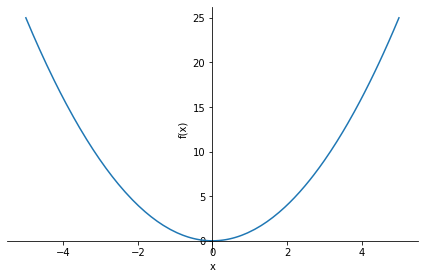

In [ ]:
p = symplot(x**2,(x, -5, 5)) # Representación gráfica de una función matemática

Representación gráfica de dos curvas en el mismo gráfico

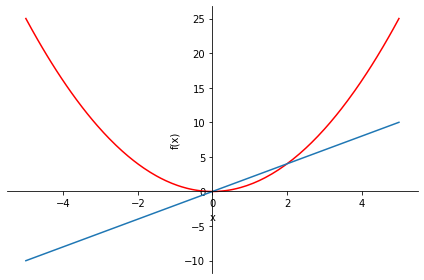

In [ ]:
p = symplot(x**2,d1,(x, -5, 5),show=False) # Se crea el gráfico con las dos funciones, el rango de representación y se desactiva la funcionalidad de representación directa
p[0].line_color = 'red' # Cambia el color de la primera gráfica
p.show() # Mostrar el gráfico

#### Sustitución
Cuando se definen las funciones de manera simbólica, es posible calcular el valor de dicha función para un determinado valor de _x_ como sigue:

In [ ]:
d1.evalf(subs={x:10})

NameError: name 'd1' is not defined

o

In [ ]:
d1.subs(x,10)

20

### Derivadas Parciales

In [ ]:
g = x**2 + y**3

In [ ]:
diff(g,x) # Primera derivada parcial con respecto a x

2*x

In [ ]:
diff(g,y) # Primera derivada parcial con respecto a y

3*y**2

In [ ]:
# Segunda derivada parcial con respecto a x
diff(g,x,2) # o diff(g,x,x)

2

In [ ]:
diff(g,y,y) # Segunda derivada parcial con respecto a y

6*y

## Análisis de funciones

### Definición de una función

In [ ]:
num = 2 * (x**2 - 9)
den = (x**2 - 4)

In [ ]:
f = num / den
f

(2*x**2 - 18)/(x**2 - 4)

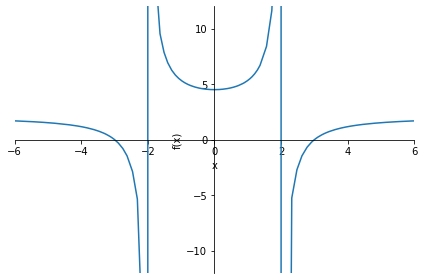

In [ ]:
p = symplot(f, xlim=(-6,6), ylim=(-12,12))

### Asíntotas Horizontales

In [ ]:
limit(f,x,oo) # oo representa infinito

2

### Asíntotas Verticales


Se iguala el denominador a cero y se almacenan las raíces en una variable.

In [ ]:
r = solve(den, x)
r

[-2, 2]

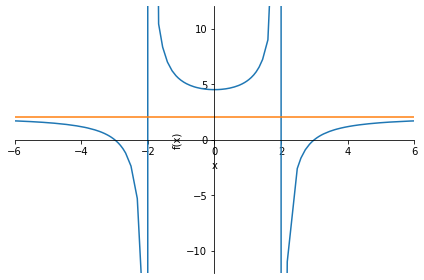

In [ ]:
# Grafica con la asíntota horizontal
p = symplot(f,2, xlim=(-6,6), ylim=(-12,12),show=false)
p.show()

### Puntos críticos

Calculamos la primera derivada e igualamos a cero.


In [ ]:
f1 = diff(f)
f1

4*x/(x**2 - 4) - 2*x*(2*x**2 - 18)/(x**2 - 4)**2

In [ ]:
criticosX = list(solveset(f1, x))
criticosX

[0]

Así pues, en este ejemplo, se tiene un único punto crítico en x = 0

In [ ]:
criticosY = [f.subs(x, a) for a in criticosX]
criticosY

[9/2]

Para ver si es un máximo o un mínimo, se analizará el signo de la segunda derivada.


### Segunda derivada

In [ ]:
f2 = diff (f, x, 2) # Calculamos la segunda derivada
f2

4*(-4*x**2/(x**2 - 4) + (x**2 - 9)*(4*x**2/(x**2 - 4) - 1)/(x**2 - 4) + 1)/(x**2 - 4)

### Sustituimos el/los puntos críticos en la segunda derivada

In [ ]:
segderiv = [f2.subs(x, cr) for cr in criticosX]
segderiv

[5/4]

Es positivo, luego hay un mínimo relativo en x = 0

Ahora se representan los puntos críticos

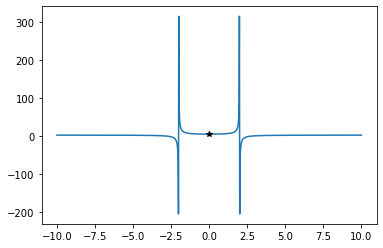

In [ ]:
import matplotlib.pyplot as plt
xx = np.linspace(-10, 10, 1000)
yy = lambdify(x, f)(xx)
plt.plot(xx, yy)
plt.plot(criticosX, criticosY, 'k*')
plt.show()

## Optimización

Para resolver un problema de optimización, normalmente se siguen los siguientes pasos:

*   Identificar las variables del problema
*   Encontrar la función a optimizar y, para el caso de dos variables (x,y),  reemplazar ```y = f(x)```
*   Reducir la función a una única variable independiente
*   Comprobar el dominio de admisión de las soluciones y descartar las absurdas
*   Calcular el máximo o mínimo de la función objetivo según los requisitos del problema


**Ejemplo:**

Queremos construir una caja cuya longitud sea tres veces su anchura.  
El material usado para construir la tapa y la base cuesta 10 euros por metro cuadrado, mientras que el material usado para construir los lados cuesta 6 euros por metro cuadrado.  
Si la caja tiene que tener un volumen de 50 metros cúbicos, determina las dimensiones que minimizan el coste de construir la caja

In [ ]:
# Hacemos un dibujo del problema
#    +--------+
#   /        /|
#  /        / |  altura
# +--------+  |
# |        |  |
# |        |  +
# |        | /
# |        |/  longitud
# +--------+
#   ancho -> x

In [ ]:
# Queremos construir una caja cuya longitud sea tres veces su anchura.
ancho = x;
longitud = 3*ancho;

In [ ]:
# Si la caja tiene que tener un volumen de 50 metros cúbicos
# Volumen = ancho * longitud * altura
# 50 = ancho * longitud * altura -> altura = 50/(ancho * longitud)
altura = 50/(ancho*longitud)
tapa = longitud*ancho
base = longitud*ancho
Coste1 = (tapa+base)*10
lateral1 = ancho*altura # el lado de la frente
lateral2 = 3*ancho*altura # el lado del lado
Coste2 = (lateral1*2 + lateral2*2 ) * 6 # 2 lados frontales y 2 lados laterales con un coste de 6
Costetotal = Coste1+Coste2
print('Coste total:', Costetotal)

# Calculamos la primera derivada
derivada=diff(Costetotal)

# Obtenemos los puntos criticos (primera derivada == 0
criticosX = list(N(solveset(derivada, x, domain=S.Reals))) # domain=S.Reals elimina números complejos del cálculo
criticosX = [cri for cri in criticosX if cri >= 0] # Solo las dimensiones positivas tienen sentido
print("Puntos criticos:", criticosX)

# Resultado del problema
for cri in criticosX:
  print(f'Las dimensiones que minimizan el coste son: Ancho = {cri} m, Longitud = {longitud.subs(x,cri)} m, Alto = {altura.subs(x,cri)} m')
  print(f'Y su coste total es {Costetotal.subs(x,cri)} €')

Coste total: 60*x**2 + 800/x
Puntos criticos: [1.88207205776206]
Las dimensiones que minimizan el coste son: Ancho = 1.88207205776206 m, Longitud = 5.64621617328617 m, Alto = 4.70518014440514 m
Y su coste total es 637.595141509567 €


### Optimización por búsqueda

La librería ```scipy``` contiene funciones que ayudan a buscar los mínimos de manera automática. No obstante, esta librería y ```sympy``` son incompatibles, así pues para hacer uso de ```scipy``` es necesario crear funciones estándar.

In [ ]:
from scipy import optimize

# en este caso, sympy no puede utilizarse y, por lo tanto, se tiene que definir una función estándar manualmente
def f(x):
    return 60*x**2 + 800/x

# Esta expresión calcula el mínimo de una función f a partir de un punto inicial
# en este caso, "1" es la estimativa inicial
optimize.fmin(f, 1)

Optimization terminated successfully.
         Current function value: 637.595142
         Iterations: 16
         Function evaluations: 32


array([1.88203125])

In [ ]:
optimize.fminbound(f, -1, 2) # Igual que la anterior pero se tienen que indicar los puntos inicial y final de búsqueda

1.8820717255379549

# Ejercicios

## Ejercicio 1

Calcula el límite de las siguiente funciones y dibuja las mismas:

$\lim\limits_{x \to 0} \frac{x^3+5}{x^4+7}$

$\lim\limits_{x \to3+} \frac{x−3}{|x−3|}$

$\lim\limits_{x \to3-} \frac{x−3}{|x−3|}$

In [ ]:
limit((x**3+5)/(x**4+7), x, 0)

5/7

In [ ]:
limit((x-3)/abs(x-3),x,3,"+")

1

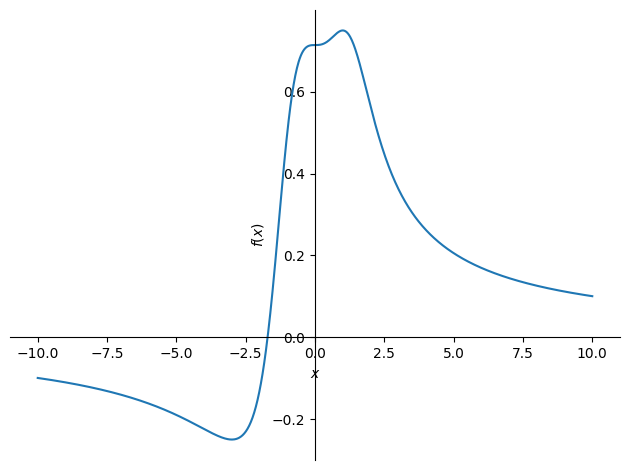

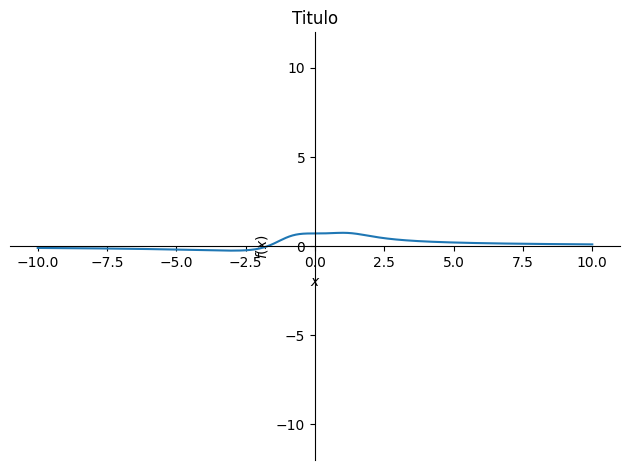

In [ ]:
p = symplot((x**3+5)/(x**4+7),show="false")
p.ylim=(-12,12)
p.title="Titulo"
p.show()

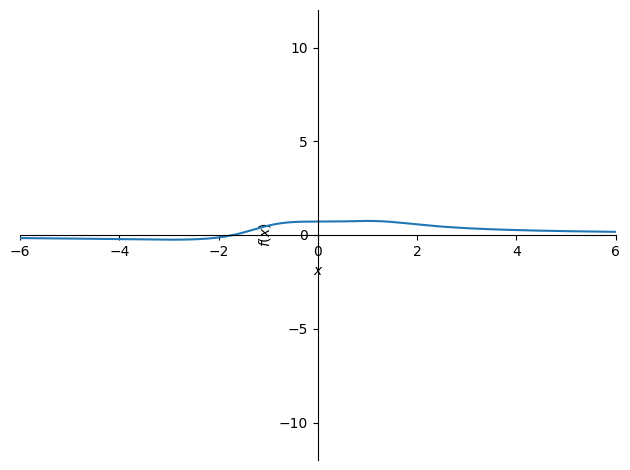

In [ ]:
p = symplot((x**3+5)/(x**4+7), xlim=(-6,6), ylim=(-12,12))

In [ ]:
limit((x-3)/abs(x-3), x, 3)

1

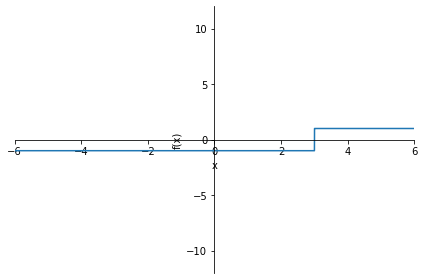

In [ ]:
p = symplot((x-3)/abs(x-3), xlim=(-6,6), ylim=(-12,12))

In [ ]:
limit((x-3)/abs(x-3), x, 3, dir="-")

-1

## Ejercicio 2

Sabiendo que $f(x)=\frac{3x+5}{x-3}$ y $g(x)=x^2+1$

Calcula los siguientes límites:

$l1 = \lim\limits_{x \to4}~f(x)$

$l2 = \lim\limits_{x \to4}~g(x)$

$lsum = \lim\limits_{x \to4}~(f(x)+g(x))$

$lrest = \lim\limits_{x \to4}~(f(x)-g(x))$

$lprod = \lim\limits_{x \to4}~(f(x)*g(x))$

$ldiv = \lim\limits_{x \to4}~\frac{f(x)}{g(x)}$

In [ ]:
f = (3*x+5)/(x-3)
g = x**2+1
limit(f,x,4)
#l1

17

In [ ]:
limit(g,x,4)
#l2

17

In [ ]:
limit(f+g,x,4)
#lsum

34

In [ ]:
limit(f-g,x,4)
#lrest

0

In [ ]:
limit(f*g,x,4)
#lprod

289

In [ ]:
limit(f/g,x,4)
#ldiv

1

## Ejercicio 3

Calcula los límites iterados de las siguientes funciones:

$\lim\limits_{(x,y) \to (4,3)}~\frac{x^2-1}{3x+y}$

$\lim\limits_{(x,y) \to (2,2)}~\frac{x+3}{xy-4}$

In [ ]:
# Primera
dx1 = limit((x**2-1)/(3*x+y),x,4)
dy1 = limit((x**2-1)/(3*x+y),y,3)
a=limit(dx1,y,3)
a
b=limit(limit((x**2-1)/(3*x+y),x,4),y,3)
b
#lxy

1

1

In [ ]:
#lyx
limit(dy1,x,4)

1

In [ ]:
# Segunda
dx2 = limit((x+3)/(y*x-4),x,2)
dy2 = limit((x+3)/(y*x-4),y,2)
limit(dx2,y,2)
#lxy

oo

In [ ]:
#lyx
limit(dy2,x,2)

oo

## Ejercicio 4

Calcula los límites iterados de la siguiente función y dibuja la función


$\lim\limits_{(x,y) \to (0,0)}~\frac{xy}{x^2+y^2}$

In [12]:
l1 = limit((x*y)/(x**2+y**2),x,0)
l2 = limit((x*y)/(x**2+y**2),y,0)
limit(l1,y,0)
#lxy

0

In [13]:
#lyx
limit(l2,x,0)

0

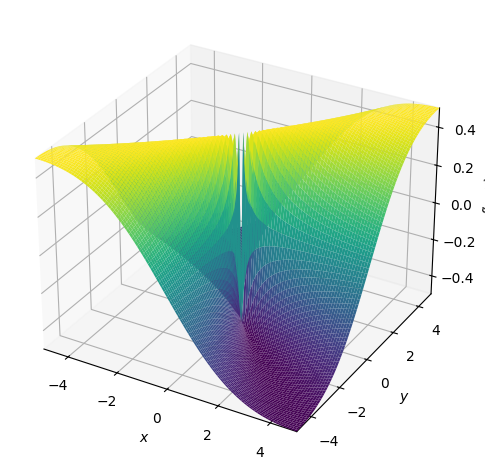

In [14]:
#gráfica
from sympy.plotting import plot3d
plot3d((x*y)/(x**2+y**2),(x,-5,5), (y,-5,5 ))

## Ejercicio 5

Obtén la derivada de la función $sin(x)$ recurriendo a la definición de derivada y utilizando el comando limit

In [ ]:
limit((sin(x + h) - sin(x))/h, h, 0)

cos(x)

## Ejercicio 6

Obtén la derivada de la matriz:

$\begin{bmatrix}cos(4x) & 3x\\x & sen(5x)\end{bmatrix}$

Verfica información sobre matrices en [https://docs.sympy.org/latest/modules/matrices/matrices.html#creating-matrices]

In [ ]:
from sympy import Matrix
M=Matrix([[cos(4*x), 3*x],[x, sin(5*x)]])
diff(M)

Matrix([
[-4*sin(4*x),          3],
[          1, 5*cos(5*x)]])

## Ejercicio 7

Calcula la primera derivada parcial respecto a x de las siguientes expresiones:

$tan(x + y)$

$ay + bx + cz$

$x^{0.5} − 3y$

In [ ]:
diff(tan(x+y),x)

tan(x + y)**2 + 1

In [ ]:
from sympy.abc import a, b, c, z
diff(a*y+b*x+c*z,x)

b

In [ ]:
diff(x**0.5-3*y,x)

0.5/x**0.5

## Ejercicio 8

Analiza las siguientes expresiones. Crea una función que al introducir las expresiones cree un gráfico con la función junto con sus
raíces, asíntotas y puntos críticos.

$\frac{2x}{x^2+1}$

$\frac{log(x)}{x}$

$\frac{x+1}{\sqrt{x-1}-5}$

$\frac{x^3}{(x-1)^2}-8$

In [ ]:
def analisis(f):

  # Enseña la expresión recibida
  print("Original:", end="")
  display(f)

  # separa la expresión en numerador y denominador
  num, den = f.as_numer_denom()

  # busca los ceros (raíces) del numerador (donde la expresión es 0)
  raices = solve(num)

  # calcula las asíntotas horizontales
  asintotas_horizontales = limit(f,x,oo)

  # calcula las asíntotas verticales
  # solveset es equivalente a solve pero permite definir un dominio (R.Reals), efectivamente barrando todos los resultados que no son numéricos
  # se converte para una lista para poder ser iterable
  asintotas_verticales = list(solveset(den, x, domain=S.Reals))

  print("Asíntotas horizontales:",asintotas_horizontales)
  print("Asíntotas verticales:",asintotas_verticales)

  # Calculo de puntos críticos
  # 1) 1a derivada
  derivada = diff(f,x)
  print("Derivada:", end="")
  display(derivada)
  # 2) calcular los ceros de la 1a derivada - el resultado son los puntos críticos
  criticos = solve(derivada, x, domain=S.Reals)
  print("Puntos críticos:", criticos)

  # 3) calcular la 2a derivada
  segunda_derivada = diff(derivada, x, 2)
  # 4) aplicar los puntos críticos en la segunda derivada
  #    si < 0 es un máximo, si > 0 es un mínimo
  criticos_en_segunda_derivada = [segunda_derivada.subs(x, cr) for cr in criticos]
  # 5) imprimir información de minimos y maximos
  #    itera los valores resultantes de sustituir los puntos críticos en la segunda derivada
  #    verifica su signo para descubrir si es máximo o mínimo
  #    imprime el valor del critico y f(critico) - hecho de forma posicional (críticos y criticos_en_segunda_derivada tienen la misma dimensión)
  for crit, crit2d in enumerate(criticos_en_segunda_derivada):
    if crit2d > 0:
      print(f"Hay un mínimo en ({criticos[crit]},{f.subs(x,criticos[crit])})")
    elif crit2d < 0:
      print(f"Hay un máximo en ({criticos[crit]},{f.subs(x,criticos[crit])})")
    else:
      print(f"El punto ({criticos[crit]},{f.subs(x,criticos[crit])}) es inconcluyente")

  # Calcula el valor del eje x
  minimos = min(float(min(criticos)-1), float(min(raices)-1), 0)
  maximos = max(float(max(criticos)+1), float(max(raices)+1))

  import matplotlib.pyplot as plt

  # Calcula el valor de f(criticos) -> sale un vector
  criticosY = [f.subs(x,crit) for crit in criticos]

  # Dibuja los puntos criticos
  # plt.plot solo acepta vectores x e y de entrada
  plt.plot(criticos, criticosY, 'k*')

  # Dibuja las raíces
  # hace el calculo de f(raíces) directamente dentro del plot
  plt.plot(raices, [f.subs(x,raiz) for raiz in raices], 'ro')

  # Caso exista asíntota horizontal la dibuja
  # toma 2 puntos (automáticamente dibuja una línea entra los 2)
  # punto 1: (valor mínimo del eje x, valor asintotas_horizontales)
  # punto 2: (valor máximo del eje x, valor asintotas_horizontales)
  # efectivamente se varia el valor de x manteniendo el valor de y constante -> línea horizontal
  if asintotas_horizontales != oo:
    plt.plot([minimos,maximos],[asintotas_horizontales,asintotas_horizontales], 'g')

  # Caso existan asíntotas verticales las dibuja
  # toma 2 puntos (automáticamente dibuja una línea entra los 2)
  # punto 1: (valor asíntota vertical, valor mínimo del eje y)
  # punto 2: (valor asíntota vertical, valor máximo del eje y)
  # efectivamente se varia el valor de y manteniendo el valor de x constante -> línea vertical
  for av in asintotas_verticales:
    plt.plot([av, av],[min(criticosY),max(criticosY)], 'y')

  # Dibujar la expresión
  # Se crea un vector que vaya desde el mínimo valor del eje x hasta el máximo, conteniendo 1000 elementos equidistantes
  xx = np.linspace(minimos, maximos, 1000)
  # Se quita valores donde f(x) sea imposible (en las asíntotas verticales)
  if asintotas_verticales:
    xx = xx[xx != asintotas_verticales]
  # se convierte la función simbólica en numérica (lambdify) y se introduce el vector xx -> resultado: vector de f(xx)
  yy = lambdify(x, f)(xx)

  # Dibuja la expresión f(x)
  plt.plot(xx,yy)
  # Cambia VISUALMENTE los ejes x e y
  plt.xlim(minimos,maximos)
  plt.ylim(float(min(criticosY)-1),float(max(criticosY)+1))

  # Enseña gráfica
  plt.show()

Original:

2*x/(x**2 + 1)

Asíntotas horizontales: 0
Asíntotas verticales: []
Derivada:

-4*x**2/(x**2 + 1)**2 + 2/(x**2 + 1)

Puntos críticos: [-1, 1]
Hay un mínimo en (-1,-1)
Hay un mínimo en (1,1)


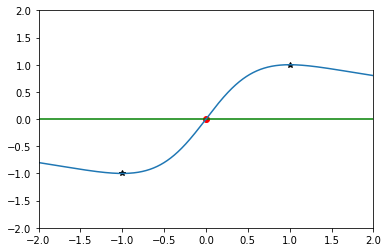

In [ ]:
analisis((2*x)/(x**2+1))

Original:

log(x)/x

Asíntotas horizontales: 0
Asíntotas verticales: [0]
Derivada:

-log(x)/x**2 + x**(-2)

Puntos críticos: [E]
Hay un mínimo en (E,exp(-1))


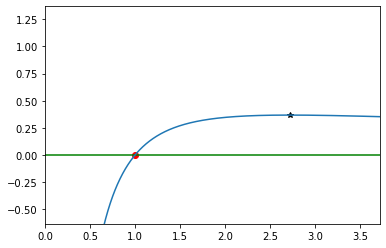

In [ ]:
analisis(ln(x)/x)

Original:

(x + 1)/(sqrt(x - 1) - 5)

Asíntotas horizontales: oo
Asíntotas verticales: [26]
Derivada:

1/(sqrt(x - 1) - 5) - (x + 1)/(2*sqrt(x - 1)*(sqrt(x - 1) - 5)**2)

Puntos críticos: [30*sqrt(3) + 53]
Hay un máximo en (30*sqrt(3) + 53,(30*sqrt(3) + 54)/(-5 + sqrt(30*sqrt(3) + 52)))


<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (x + 1)/(sqrt(x - 1) - 5)


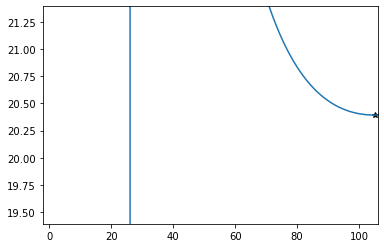

In [ ]:
analisis((x+1)/(sqrt(x-1)-5))

Original:

x**3/(x - 1)**2 - 8

Asíntotas horizontales: oo
Asíntotas verticales: [1]
Derivada:

-2*x**3/(x - 1)**3 + 3*x**2/(x - 1)**2

Puntos críticos: [0, 3]
Hay un mínimo en (0,-8)
Hay un máximo en (3,-5/4)


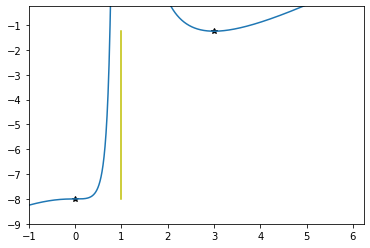

In [ ]:
analisis((x**3)/((x-1)**2)-8)

## Ejercicio 9

Una ventana se construye en su parte superior con un semicírculo y en su parte inferior con un rectángulo. Si hay 12m de materiales, ¿cuáles serán las dimensiones de la ventana para que entre la mayor cantidad de luz?

nuevo_y:


-pi*x/2 - x + 6

Puntos criticos: [12/(pi + 4)]
Anchura optima: 24/(pi + 4)
Altura optima: -6*pi/(pi + 4) - 12/(pi + 4) + 6


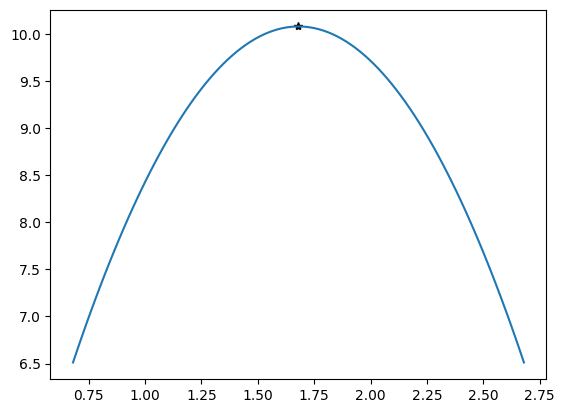

In [2]:
# radio es x
# Perimetro semicirculo
Perimetro_semi = x * (2 + pi)
# Perimetro rectangulo; y es la altura
Perimetro_rect = ((x * 2) + y) * 2

# El perimetro total es 12, así que hay que resolver los perimetros para ese valor
# para no borrar el y (que es simbolico) se crea una nueva variable
# Hay que restar la parte de bajo del semicirculo y la de arriba del rectangulo (porque están unidas) -> x*2
nuevo_y = solve((Perimetro_semi - x * 2) + (Perimetro_rect - x*2) - 12, y)[0]
print("nuevo_y:")
display(nuevo_y)

# Area de semicirculo
Area_semi = (pi * (x ** 2))/2
# area rectangulo
Area_rectangulo = (x * 2) * nuevo_y
# Total de area que se va a minimizar
Area_total = Area_rectangulo + Area_semi
# Hallar la derivada
derivada_Area = diff(Area_total,x)
# Hallar los criticos -> correspondiente al radio (x)
criticos = solve(derivada_Area)
# Hallar los correspondientes valores de y de los criticos
criticosY = [Area_total.subs(x,crit) for crit in criticos]
# Dibujar
import matplotlib.pyplot as plt
plt.plot(criticos, criticosY, 'k*')
plt.plot([crit for crit in np.linspace(float(min(criticos))-1, float(max(criticos))+1, 100)],[Area_total.subs(x,crit) for crit in np.linspace(float(min(criticos))-1, float(max(criticos))+1, 100)])

print("Puntos criticos:", criticos)
print("Anchura optima:", criticos[0]*2)
print("Altura optima:", nuevo_y.subs(x,criticos[0]))

## Ejercicio 10

Determina los puntos sobre $y = x^2 + 1$ más cercanos a $(0, 2)$

Puntos críticos: [0, -sqrt(2)/2, sqrt(2)/2]


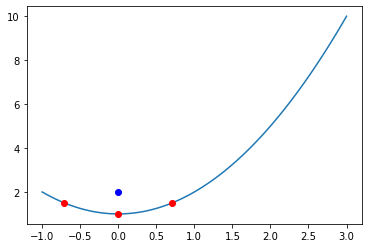

In [ ]:
# Versión Manual
puntox = 0
puntoy = 2
f = x**2+1
# Distancia euclidiana
distancia = sqrt((x - puntox)**2 + (f - puntoy)**2)
distancia
derivada = diff(distancia)
criticos = solve(derivada)
print("Puntos críticos:", criticos)
funcion_y = [f.subs(x,puntos) for puntos in np.linspace(-1,3,100)]
plt.plot(np.linspace(-1,3,100), funcion_y)
criticos_y = [f.subs(x,puntos) for puntos in criticos]
plt.plot(criticos, criticos_y, 'ro')
plt.plot(0,2,'ob')

## Ejercicio 11

Calcula la matriz Jacobiana de $g(x, y, z) = (e^x, cos(y), sen(z))$

Verifica cómo calcular la jacobiana en [https://docs.sympy.org/latest/modules/matrices/matrices.html]

In [17]:
g = Matrix([exp(x),cos(y),sin(z)])
g.jacobian([x,y,z])

Matrix([
[exp(x),       0,      0],
[     0, -sin(y),      0],
[     0,       0, cos(z)]])

In [21]:
from sympy import hessian
hessian(g,(x,y,z))

ShapeError: 
The Matrix `value` doesn't have the same dimensions as the in sub-
Matrix given by `key`.

## Ejercicio 12

Calcula la matriz Hessiana de la función $f (x, y) = xy + 2zx$

Verifica cómo calcular la Hessiana en [https://docs.sympy.org/latest/modules/matrices/matrices.html]

In [ ]:
f = x*y+2*z*x

from sympy import hessian
hessian(f,(x,y,z))

Matrix([
[0, 1, 2],
[1, 0, 0],
[2, 0, 0]])

## Ejercicio 11

Representa las siguientes funciones y calcula su gradiente

$f (x, y) = x^2y^3$

$g(x, y) = xe^{−x^2−y^2}$

Recuerda que el **gradiente** es el vector formado por las derivadas parciales de una función **escalar**.

La matriz **jacobiana** es la matriz formada por las derivadas parciales de una función vectorial. Sus vectores son los **gradientes** de los respectivos componentes de la función.

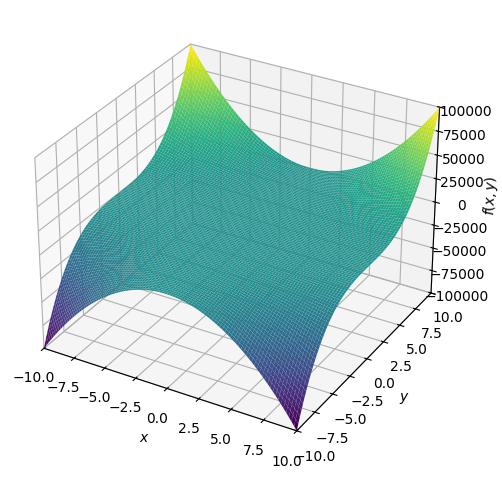

Matrix([[2*x*y**3, 3*x**2*y**2]])

In [15]:
from sympy.matrices import Matrix

f = x**2*y**3
plot3d(f)
display(Matrix([f]).jacobian([x,y]))

In [4]:
from sympy import exp
g = x*exp(-x**2-y**2)
plot3d(g)
Matrix([g]).jacobian([x,y])

NameError: name 'plot3d' is not defined